# # Data Mining & Machine Learning
In this notebook, we will:
- Apply data mining methods (Regression & Classification)
- Evaluate models & patterns
- Iterate with different parameters and preprocessing

In [2]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/processed/feature_engineered.csv')

# Optional: sample subset for faster experimentation
df_sample = df.sample(n=200000, random_state=42)  # 200k rows for testing
df_sample.shape


(200000, 130)

## 2️⃣ Define Features & Targets
We will prepare features for regression and classification tasks.
- Regression targets: EXT, NEU, AGR, CON, OPN
- Classification targets: EXT_bin, NEU_bin, AGR_bin, CON_bin, OPN_bin
- Features: PCA numeric items + mean/std scores

In [3]:
# Select numeric features (use PCA components or engineered items)
numeric_cols = [col for col in df_sample.columns if '_E' in col]  # engineered numeric items
additional_features = ['EXT_mean','NEU_mean','AGR_mean','CON_mean','OPN_mean','EXT_std','NEU_std','AGR_std','CON_std','OPN_std']
feature_cols = numeric_cols + additional_features

# Regression targets
reg_targets = ['EXT','NEU','AGR','CON','OPN']

# Classification targets
class_targets = ['EXT_bin','NEU_bin','AGR_bin','CON_bin','OPN_bin']

# Features & targets
X = df_sample[feature_cols]
y_reg = df_sample[reg_targets]
y_class = df_sample[class_targets]


In [4]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Dimensionality Reduction
Reduce dimensionality to retain 95% variance.

In [5]:
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Original features:", X_scaled.shape[1])
print("Reduced PCA components:", X_pca.shape[1])

Original features: 60
Reduced PCA components: 55


In [ ]:
# SMML: Data Preparation
import pandas as pd
from sklearn.model_selection import train_test_split

# Load feature-engineered dataset
df = pd.read_csv('../data/processed/feature_engineered.csv')

# Select features (numeric item features + other engineered features)
feature_cols = [c for c in df.columns if '_E' in c or c.endswith('_mean') or c.endswith('_std')]
target_reg = 'EXT'
target_clf = 'EXT_bin'

X = df[feature_cols]
y_reg = df[target_reg]
y_clf = df[target_clf]

# Train-test split
X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_reg, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (809182, 60) Test shape: (202296, 60)


In [8]:
# SMML: Regression Model - Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

rf_reg = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1)
rf_reg.fit(X_train, y_reg_train)

# Predictions
y_reg_pred = rf_reg.predict(X_test)

# Metrics
r2 = r2_score(y_reg_test, y_reg_pred)
rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
print(f"R² score: {r2}")
print(f"RMSE: {rmse}")

R² score: 0.9792737023139806
RMSE: 0.14356475584290726


In [9]:
# SMML: Classification Model - Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_clf_train)

# Predictions
y_clf_pred = rf_clf.predict(X_test)

# Metrics
acc = accuracy_score(y_clf_test, y_clf_pred)
print("Accuracy:", acc)
print(classification_report(y_clf_test, y_clf_pred))

Accuracy: 0.9247637125795863
              precision    recall  f1-score   support

        High       0.96      0.93      0.95     67432
         Low       0.95      0.93      0.94     67435
      Medium       0.87      0.92      0.89     67429

    accuracy                           0.92    202296
   macro avg       0.93      0.92      0.93    202296
weighted avg       0.93      0.92      0.93    202296



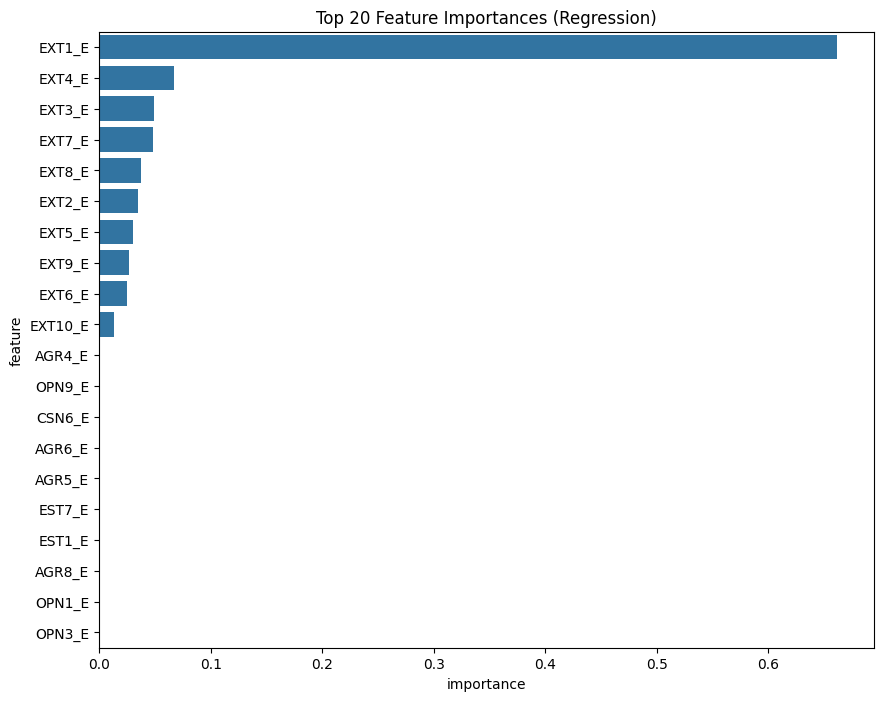

In [11]:
# SMML: Feature Importance - Regression
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_reg.feature_importances_
feat_importance = pd.DataFrame({'feature': feature_cols, 'importance': importances}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='feature', data=feat_importance.head(20))
plt.title("Top 20 Feature Importances (Regression)")
plt.show()


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

# Metrics
r2 = r2_score(y_reg_test, y_test_pred)
# ...existing code...
rmse = np.sqrt(mean_squared_error(y_reg_test, y_test_pred))
# ...existing code...

print(f"Regression R² score: {r2}")
print(f"Regression RMSE: {rmse}")


Regression R² score: 0.9792737023139806
Regression RMSE: 0.1435647558429073


In [13]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_class_pred = rf_clf.predict(X_test)

# Metrics
accuracy = accuracy_score(y_clf_test, y_class_pred)
print(f"Classification Accuracy: {accuracy}")
print(classification_report(y_clf_test, y_class_pred))


Classification Accuracy: 0.9247637125795863
              precision    recall  f1-score   support

        High       0.96      0.93      0.95     67432
         Low       0.95      0.93      0.94     67435
      Medium       0.87      0.92      0.89     67429

    accuracy                           0.92    202296
   macro avg       0.93      0.92      0.93    202296
weighted avg       0.93      0.92      0.93    202296



In [14]:
import time
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.model_selection import cross_val_score

# ⚡ Optimized LightGBM models
lgb_reg = LGBMRegressor(
    n_estimators=500,        # number of boosting rounds
    learning_rate=0.05,      # smaller lr + more estimators = better accuracy
    num_leaves=31,           # controls complexity of trees
    max_depth=-1,            # let LightGBM choose
    n_jobs=-1,               # use all CPU threads
    random_state=42
)

lgb_clf = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    n_jobs=-1,
    random_state=42
)

# Time measurement
start = time.time()

# ✅ Regression CV
cv_scores_reg = cross_val_score(lgb_reg, X_train, y_reg_train, cv=3, scoring='r2')
print("Regression CV R² scores:", cv_scores_reg)
print("Mean CV R²:", cv_scores_reg.mean())

# ✅ Classification CV
cv_scores_clf = cross_val_score(lgb_clf, X_train, y_clf_train, cv=3, scoring='accuracy')
print("Classification CV Accuracy scores:", cv_scores_clf)
print("Mean CV Accuracy:", cv_scores_clf.mean())

print(f"\n⏱️ Total runtime: {time.time() - start:.2f} seconds")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070769 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 539454, number of used features: 60
[LightGBM] [Info] Start training from score 0.000878
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 539455, number of used features: 60
[LightGBM] [Info] Start training from score 0.000705
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 539455, number of used features: 60
[LightGBM] [Info] Sta

## 🔎 Check for Overfitting or Underfitting
Compare training and testing performance to detect overfitting (high train, low test) or underfitting (low train, low test).


In [15]:
from sklearn.metrics import r2_score, accuracy_score

# --- Regression ---
train_r2 = r2_score(y_reg_train, y_train_pred)
test_r2 = r2_score(y_reg_test, y_test_pred)

print("Regression Performance:")
print(f"  Train R²: {train_r2:.4f}")
print(f"  Test  R²: {test_r2:.4f}")

# --- Classification ---
train_acc = accuracy_score(y_clf_train, rf_clf.predict(X_train))
test_acc = accuracy_score(y_clf_test, y_class_pred)

print("\nClassification Performance:")
print(f"  Train Accuracy: {train_acc:.4f}")
print(f"  Test  Accuracy: {test_acc:.4f}")

# Quick interpretation helper
if train_r2 - test_r2 > 0.1 or train_acc - test_acc > 0.05:
    print("\n⚠️ Potential Overfitting: Model performs much better on train than test.")
elif test_r2 < 0.3 or test_acc < 0.6:
    print("\n⚠️ Potential Underfitting: Model struggles on both train and test.")
else:
    print("\n✅ Model shows balanced generalization.")


Regression Performance:
  Train R²: 0.9858
  Test  R²: 0.9793

Classification Performance:
  Train Accuracy: 0.9963
  Test  Accuracy: 0.9248

⚠️ Potential Overfitting: Model performs much better on train than test.


## ⚙️ Hyperparameter Tuning 
Use `RandomizedSearchCV` to explore different hyperparameter configurations and improve performance.


In [16]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# ✅ Convert features to float32 (saves memory)
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# ✅ Define parameter grid for Random Forest Regression
param_grid = {
    'n_estimators': [100, 200],        # keep smaller range
    'max_depth': [None, 10, 20],       # fewer depth options
    'min_samples_split': [2, 5]        # fewer split options
}

# ✅ Use RandomizedSearchCV with lighter settings
search = RandomizedSearchCV(
    estimator=rf_reg,
    param_distributions=param_grid,
    n_iter=3,         # fewer random combinations
    cv=2,             # 2-fold CV instead of 3
    scoring='r2',
    n_jobs=1,         # no parallel jobs (avoids memory explosion)
    verbose=2,
    random_state=42
)

# ✅ Subsample training set for faster search (optional)
X_sample = X_train.sample(n=10000, random_state=42)
y_sample = y_reg_train.loc[X_sample.index]

# Run search on smaller sample
search.fit(X_sample, y_sample)

print("\n✅ Best Parameters Found:", search.best_params_)
print("✅ Best CV R²:", round(search.best_score_, 4))

# ✅ Refit model with best parameters on full training set
best_rf_reg = search.best_estimator_
best_rf_reg.fit(X_train, y_reg_train)


Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time=   4.4s
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time=   4.4s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=   9.8s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=  10.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   5.3s

✅ Best Parameters Found: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 20}
✅ Best CV R²: 0.9018


,n_estimators,200
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
# import joblib
# import os

# # Save models
# reg_path = "../models/rf_regression_model.pkl"
# clf_path = "../models/rf_classification_model.pkl"

# joblib.dump(best_rf_reg, reg_path)
# joblib.dump(rf_clf, clf_path)

In [20]:
# # SMML: Train RandomForest per trait with scaling
# import pandas as pd
# import numpy as np
# import os, pickle
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.preprocessing import StandardScaler

# # -----------------------
# # Load Data
# # -----------------------
# df = pd.read_csv("../data/processed/feature_engineered.csv")

# # Use only 20 questions (short form)
# feature_cols = ["EXT1","EXT2","EXT3","EXT4",
#                 "AGR1","AGR2","AGR3","AGR4",
#                 "CSN1","CSN2","CSN3","CSN4",
#                 "EST1","EST2","EST3","EST4",
#                 "OPN1","OPN2","OPN3","OPN4"]

# X = df[feature_cols].copy()
# traits = ["EXT","NEU","AGR","CON","OPN"]

# # -----------------------
# # Split data once for consistency
# # -----------------------
# X_train, X_test, y_train_all, y_test_all = train_test_split(
#     X, df[traits], test_size=0.2, random_state=42
# )

# print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# # -----------------------
# # Train per-trait models with scaling
# # -----------------------
# models = {}
# scalers = {}
# results = []

# for trait in traits:
#     print(f"\n🔹 Training for {trait}...")
    
#     # Scale target
#     scaler = StandardScaler()
#     y_train = scaler.fit_transform(y_train_all[[trait]]).ravel()
#     y_test = scaler.transform(y_test_all[[trait]]).ravel()
    
#     # Train RF
#     rf = RandomForestRegressor(
#         n_estimators=200, max_depth=20, random_state=42, n_jobs=-1
#     )
#     rf.fit(X_train, y_train)
    
#     # Predictions
#     y_train_pred = rf.predict(X_train)
#     y_test_pred = rf.predict(X_test)
    
#     # Metrics
#     r2_train = r2_score(y_train, y_train_pred)
#     r2_test = r2_score(y_test, y_test_pred)
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
#     print(f"Train R²: {r2_train:.3f} | Test R²: {r2_test:.3f} | Test RMSE: {rmse_test:.3f}")
    
#     results.append((trait, r2_train, r2_test, rmse_test))
#     models[trait] = rf
#     scalers[trait] = scaler

# # -----------------------
# # Save models + scalers
# # -----------------------
# save_dir = "../remodels/rf_20q_scaled"
# os.makedirs(save_dir, exist_ok=True)

# for trait in traits:
#     with open(f"{save_dir}/rf_{trait}.pkl", "wb") as f:
#         pickle.dump(models[trait], f)
#     with open(f"{save_dir}/scaler_{trait}.pkl", "wb") as f:
#         pickle.dump(scalers[trait], f)

# print(f"\n✅ Saved models and scalers in {save_dir}")


In [21]:
# # SMML: Train LightGBM per trait with scaling
# import pandas as pd
# import numpy as np
# import os, pickle
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.preprocessing import StandardScaler
# from lightgbm import LGBMRegressor

# # -----------------------
# # Load Data
# # -----------------------
# df = pd.read_csv("../data/processed/feature_engineered.csv")

# # Use only 20 questions (short form)
# feature_cols = ["EXT1","EXT2","EXT3","EXT4",
#                 "AGR1","AGR2","AGR3","AGR4",
#                 "CSN1","CSN2","CSN3","CSN4",
#                 "EST1","EST2","EST3","EST4",
#                 "OPN1","OPN2","OPN3","OPN4"]

# X = df[feature_cols].copy()
# traits = ["EXT","NEU","AGR","CON","OPN"]

# # -----------------------
# # Split data once for consistency
# # -----------------------
# X_train, X_test, y_train_all, y_test_all = train_test_split(
#     X, df[traits], test_size=0.2, random_state=42
# )

# print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# # -----------------------
# # Train per-trait models with scaling
# # -----------------------
# models = {}
# scalers = {}
# results = []

# for trait in traits:
#     print(f"\n🔹 Training for {trait}...")

#     # Scale target
#     scaler = StandardScaler()
#     y_train = scaler.fit_transform(y_train_all[[trait]]).ravel()
#     y_test = scaler.transform(y_test_all[[trait]]).ravel()

#     # Train LightGBM
#     lgb = LGBMRegressor(
#         n_estimators=500,        # number of boosting rounds
#         learning_rate=0.05,      # lower lr + more trees → accuracy
#         num_leaves=31,           # complexity of trees
#         max_depth=-1,            # let LightGBM choose best depth
#         subsample=0.8,           # row sampling for regularization
#         colsample_bytree=0.8,    # feature sampling for regularization
#         n_jobs=-1,
#         random_state=42
#     )
#     lgb.fit(X_train, y_train)

#     # Predictions
#     y_train_pred = lgb.predict(X_train)
#     y_test_pred = lgb.predict(X_test)

#     # Metrics
#     r2_train = r2_score(y_train, y_train_pred)
#     r2_test = r2_score(y_test, y_test_pred)
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

#     print(f"Train R²: {r2_train:.3f} | Test R²: {r2_test:.3f} | Test RMSE: {rmse_test:.3f}")

#     results.append((trait, r2_train, r2_test, rmse_test))
#     models[trait] = lgb
#     scalers[trait] = scaler

# # -----------------------
# # Save models + scalers
# # -----------------------
# save_dir = "../LightGBModel/lgbm_20q_scaled"
# os.makedirs(save_dir, exist_ok=True)

# for trait in traits:
#     with open(f"{save_dir}/lgbm_{trait}.pkl", "wb") as f:
#         pickle.dump(models[trait], f)
#     with open(f"{save_dir}/scaler_{trait}.pkl", "wb") as f:
#         pickle.dump(scalers[trait], f)

# print(f"\n✅ Saved models and scalers in {save_dir}")

# # -----------------------
# # Save results summary
# # -----------------------
# results_df = pd.DataFrame(results, columns=["Trait", "R² Train", "R² Test", "RMSE Test"])
# results_df.to_csv(f"{save_dir}/training_results.csv", index=False)
# print("\n📊 Training results saved as CSV:")
# print(results_df)
